In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

In [3]:
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [4]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [5]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

In [6]:
path_graph = "../DataSet StackOverflow/Graph_data/"

In [7]:
path_couple= "../DataSet StackOverflow/tags_edges_with_time.csv"

In [8]:
df_couple = pd.read_csv(path_couple)

In [9]:
df_couple

,Source,Target,Timeval,Month,Day,MonthDay
0,string,algorithm,2020-01-01 00:06:24,1,1,101
1,flutter,paypal,2020-01-01 00:09:38,1,1,101
2,flutter,payment-gateway,2020-01-01 00:09:38,1,1,101
3,paypal,payment-gateway,2020-01-01 00:09:38,1,1,101
4,java,json,2020-01-01 00:14:40,1,1,101
...,...,...,...,...,...,...
226201,vue.js,vue-router,2020-12-31 23:08:44,12,31,1231
226202,vue.js,bootstrap-vue,2020-12-31 23:08:44,12,31,1231
226203,vue-component,vue-router,2020-12-31 23:08:44,12,31,1231
226204,vue-component,bootstrap-vue,2020-12-31 23:08:44,12,31,1231


In [9]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [10]:
gen = df_couple[df_couple["Month"] ==1]
feb = df_couple[df_couple["Month"] ==2]
mar = df_couple[df_couple["Month"] ==3]
apr = df_couple[df_couple["Month"] ==4]
may = df_couple[df_couple["Month"] ==5]
jun = df_couple[df_couple["Month"] ==6]
jul = df_couple[df_couple["Month"] ==7]
aug = df_couple[df_couple["Month"] ==8]
sep = df_couple[df_couple["Month"] ==9]
ott= df_couple[df_couple["Month"] ==10]
nov = df_couple[df_couple["Month"] ==11]
dec = df_couple[df_couple["Month"] ==12]

In [11]:
def select_edges(data):
    edges = []
    for i in data[["Source", "Target"]].values:
        edges.append((i[0], i[1]))
    return edges

In [12]:
edges_month =[]
edges_month.append(select_edges(gen))
edges_month.append(select_edges(feb))
edges_month.append(select_edges(mar))
edges_month.append(select_edges(apr))
edges_month.append(select_edges(may))
edges_month.append(select_edges(jun))
edges_month.append(select_edges(jul))
edges_month.append(select_edges(aug))
edges_month.append(select_edges(sep))
edges_month.append(select_edges(ott))
edges_month.append(select_edges(nov))
edges_month.append(select_edges(dec))

# 1) Algoritmi Community Discovery

### Louvain

In [13]:
resolution = ensemble.Parameter(name="resolution", start=0.1, end=1, step=0.1)
randomize = ensemble.BoolParameter(name="randomize") # boolean range [True, False]
parameters = [resolution, randomize]

In [14]:
louvain_n_of_comm = []
louvain_modularity = []
louvain_avg = []
louvain_intdgr = []
for i in range(len(edges_month)):
    subgraph = nx.Graph(nx.edge_subgraph(G, edges_month[i]))
    nx.write_graphml(subgraph, f"CommunityDiscovery/subgraph_month_{i}.graphml")
    
    louvain_coms, scoring = ensemble.random_search(graph=subgraph, method=algorithms.louvain,
                                                       parameters=parameters,
                                                       quality_score=evaluation.newman_girvan_modularity, aggregate=max)
    louvain_n_of_comm.append(len(louvain_coms.communities))
    louvain_modularity.append(louvain_coms.newman_girvan_modularity())
    louvain_avg.append(louvain_coms.average_internal_degree())
    louvain_intdgr.append(louvain_coms.internal_edge_density())
    with open(f'CommunityDiscovery/communities_{i}.pickle', 'wb') as f:
        pickle.dump(louvain_coms, f)

### LabelPropagation

In [15]:
label_n_of_comm = []
label_modularity = []
label_avg = []
label_intdgr = []
for i in range(len(edges_month)):
    subgraph = nx.Graph(nx.edge_subgraph(G, edges_month[i]))
    
    label_coms = algorithms.label_propagation(subgraph)
    label_n_of_comm.append(len(label_coms.communities))
    label_modularity.append(label_coms.newman_girvan_modularity())
    label_avg.append(label_coms.average_internal_degree())
    label_intdgr.append(label_coms.internal_edge_density())

### Demon

In [16]:
eps = ensemble.Parameter(name="epsilon", start=0.1, end=0.6, step=0.1)
size = ensemble.Parameter(name="min_com_size", start=3, end=5,step=1)

In [17]:
demon_n_of_comm = []
demon_modularity = []
demon_avg = []
demon_intdgr = []
for i in range(len(edges_month)):
    subgraph = nx.Graph(nx.edge_subgraph(G, edges_month[i]))
    
    demon_coms, scoring = ensemble.random_search(graph=subgraph, method=algorithms.demon,
                                                       parameters=[eps, size],
                                                       quality_score=evaluation.newman_girvan_modularity, aggregate=max)
    demon_n_of_comm.append(len(demon_coms.communities))
    demon_modularity.append(demon_coms.newman_girvan_modularity())
    demon_avg.append(demon_coms.average_internal_degree())
    demon_intdgr.append(demon_coms.internal_edge_density())

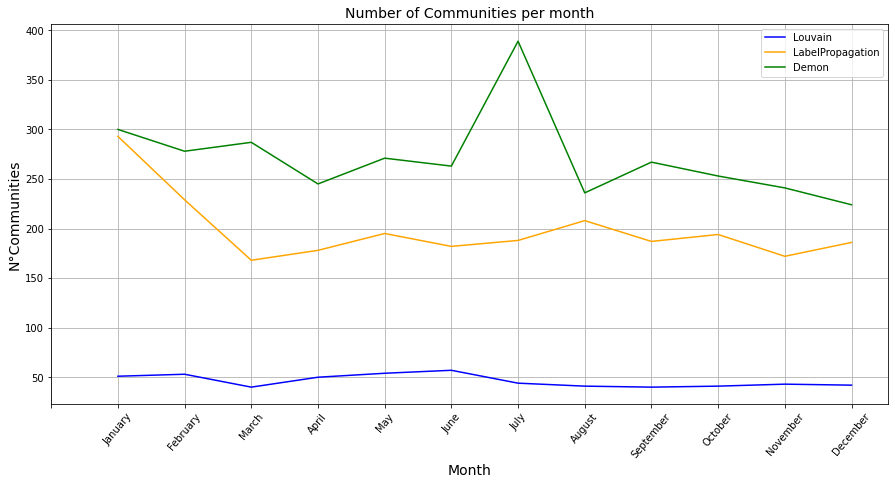

In [18]:
plt.figure(figsize=(15,7))
plt.plot([i for i in range(1, 13)], louvain_n_of_comm , color='blue')
plt.plot([i for i in range(1, 13)], label_n_of_comm , color='orange')
plt.plot([i for i in range(1, 13)], demon_n_of_comm , color='green')
plt.legend(["Louvain", "LabelPropagation", "Demon"])
plt.title('Number of Communities per month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(np.arange(13),["", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=50)
plt.ylabel('N°Communities', fontsize=14)
plt.grid(True)
plt.show()

# 2) Analisi grafi dei mesi

In [11]:
graphs = []
for i in range(0,12):
    tmp = nx.read_graphml(f"CommunityDiscovery/subgraph_month_{i}.graphml")
    graphs.append(tmp)

In [12]:
len(graphs)

12

In [13]:
def analysis(G, idx):
    info = []
    #print(f"------ ANALYSIS FOR GRAPH {idx} ------")
    N = G.number_of_nodes()
    #print(f"Number of nodes: {N}")
    E = G.number_of_edges()
    #print(f"Number of edges: {E}")
    LMAX = (N * (N-1))/2.0
    #print(f"LMAX: {LMAX}")
    avg_degree=(2*G.number_of_edges())/N
    #print(f"AVG Degree: {avg_degree}")
    density = nx.density(G)
    #print("Density: ", density)
    avg_cluster = nx.average_clustering(G)
    #print("Avg Clustering coefficient:", avg_cluster)
    n_connected_component = list(nx.connected_components(G))
    nn_components = len(n_connected_component)
    #print(f"Number of Connected Components for {len(n_connected_component)}: ")
    first_component_lenght = len(n_connected_component[0])
    #print(f"Len First component: {first_component_lenght}")
    info.append(N)
    info.append(E)
    info.append(LMAX)
    info.append(avg_degree)
    info.append(density)
    info.append(avg_cluster)
    info.append(list(n_connected_component[0]))
    info.append(first_component_lenght)
    info.append(nn_components)
    return info

In [14]:
nodes = []
edges = []
lmax = []
avg_degree = []
density = []
avg_cluster = []
n_connected_component = []
first_component_lenght = []
nn_components = []
#start_time = time.time()
for idx, k in enumerate(graphs):
    info = analysis(k, idx)
    nodes.append(info[0])
    edges.append(info[1])
    lmax.append(info[2])
    avg_degree.append(info[3])
    density.append(info[4])
    avg_cluster.append(info[5])
    n_connected_component.append(info[6])
    first_component_lenght.append(info[7])
    nn_components.append(info[8])
    print(f"COMPLETED GRAPH {idx}")

COMPLETED GRAPH 0
COMPLETED GRAPH 1
COMPLETED GRAPH 2
COMPLETED GRAPH 3
COMPLETED GRAPH 4
COMPLETED GRAPH 5
COMPLETED GRAPH 6
COMPLETED GRAPH 7
COMPLETED GRAPH 8
COMPLETED GRAPH 9
COMPLETED GRAPH 10
COMPLETED GRAPH 11


In [15]:
new_df = pd.DataFrame({"Nodes": nodes,
                      "Edges": edges,
                      "Lmax": lmax,
                      "Avg_Degree": avg_degree,
                      "Density": density,
                      "Avg_Cluster": avg_cluster,
                      "N_Connected_Component": n_connected_component,
                       "Len_CC":nn_components,
                      "First_Component_Length": first_component_lenght,
                       "Month": [i for i in range(1,13)]
                      })
new_df.to_csv("months_analysis_pt1.csv", index=False)

In [17]:
def paths_analysis(G, idx):
    info = []
    connected = nx.is_connected(G)
    #print(f"Is connected = {connected}")
    if not connected:
        H = nx.Graph()
        H = nx.subgraph(G,n_connected_component[0])
        if nx.is_connected(H):
            diameter = nx.diameter(H)
            avg_shortest_path = nx.average_shortest_path_length(H)
        else:
            diameter = -1
            avg_shortest_path = -1
    else:
        diameter = nx.diameter(G)
        avg_shortest_path = nx.average_shortest_path_length(G)
    #print(f"Diameter network {diameter}")
    #print(f"Avg Shortest path {avg_shortest_path}")
    info.append(diameter)
    info.append(avg_shortest_path)
    return info

In [19]:
diameter = []
avg_shortest_path = []
nn_components = []
#start_time = time.time()
for idx, k in enumerate(graphs):
    info = paths_analysis(k, idx)
    diameter.append(info[0])
    avg_shortest_path.append(info[1])
    print(f"COMPLETED GRAPH {idx}")

COMPLETED GRAPH 0
COMPLETED GRAPH 1
COMPLETED GRAPH 2
COMPLETED GRAPH 3
COMPLETED GRAPH 4
COMPLETED GRAPH 5
COMPLETED GRAPH 6
COMPLETED GRAPH 7
COMPLETED GRAPH 8
COMPLETED GRAPH 9
COMPLETED GRAPH 10
COMPLETED GRAPH 11


In [22]:
diameter

[7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [20]:
new_df = pd.DataFrame({
                      "Diameter": diameter,
                      "Avg_Shortest_Path": avg_shortest_path,
                      })
new_df.to_csv("months_analysis_pt2.csv", index=False)